# CS210 FINAL PROJECT

### Baturay Yılmaz - 23933
### Doruk Ertoğlu - 23796

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [2]:
from os.path import join
from pprint import pprint

## Exploring and Describing NBA Player Statistics Data

In [3]:
d_file = "Seasons_Stats.csv" #Our first data set downloaded from kaggle

In [4]:
df = pd.read_csv(d_file)

In [5]:
df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [6]:
print(df.columns)

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [7]:
n_rows, n_columns = df.shape  
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 24691, number of columns: 53


In [8]:
df.dtypes

Unnamed: 0      int64
Year          float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
GS            float64
MP            float64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%          float64
blanl         float64
OWS           float64
DWS           float64
WS            float64
WS/48         float64
blank2        float64
OBPM          float64
DBPM          float64
BPM           float64
VORP          float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB       

### Dealing With NaN Values

In [9]:
df.isnull().sum()  # NaN counts in each column

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


In [10]:
na_ratios = df.isnull().sum() / n_rows  # finding the NaN value ratio of each column
                                        # it returns a series object with column names as indices
print(na_ratios)

Unnamed: 0    0.000000
Year          0.002714
Player        0.002714
Pos           0.002714
Age           0.003038
Tm            0.002714
G             0.002714
GS            0.261553
MP            0.022397
PER           0.023895
TS%           0.006197
3PAr          0.237009
FTr           0.006723
ORB%          0.157912
DRB%          0.157912
TRB%          0.126362
AST%          0.086509
STL%          0.157912
BLK%          0.157912
TOV%          0.206918
USG%          0.204568
blanl         1.000000
OWS           0.004293
DWS           0.004293
WS            0.004293
WS/48         0.023895
blank2        1.000000
OBPM          0.157709
DBPM          0.157709
BPM           0.157709
VORP          0.157709
FG            0.002714
FGA           0.002714
FG%           0.006723
3P            0.233445
3PA           0.233445
3P%           0.375643
2P            0.002714
2PA           0.002714
2P%           0.007898
eFG%          0.006723
FT            0.002714
FTA           0.002714
FT%        

####  Since "blanl" and "blank2" are empty columns we should drop them.

In [11]:
df.drop(["blanl", "blank2"], axis=1, inplace=True) #Since they are all empty, because their NAN ratio is 1

In [12]:
print(df.columns) #no more blanl and blank2

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [13]:
df[df["Year"].isnull()]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
312,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128,1128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1236,1236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1348,1348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Each attribute is also NaN when Year attribute is NaN

In [14]:
index2drop = df[df["Year"].isnull()].index  # since each attribute is also NaN when Year attribute is NaN

df.drop(index2drop, inplace=True) #we can drop those rows

In [15]:
df.isnull().sum()

Unnamed: 0       0
Year             0
Player           0
Pos              0
Age              8
Tm               0
G                0
GS            6391
MP             486
PER            523
TS%             86
3PAr          5785
FTr             99
ORB%          3832
DRB%          3832
TRB%          3053
AST%          2069
STL%          3832
BLK%          3832
TOV%          5042
USG%          4984
OWS             39
DWS             39
WS              39
WS/48          523
OBPM          3827
DBPM          3827
BPM           3827
VORP          3827
FG               0
FGA              0
FG%             99
3P            5697
3PA           5697
3P%           9208
2P               0
2PA              0
2P%            128
eFG%            99
FT               0
FTA              0
FT%            858
ORB           3827
DRB           3827
TRB            312
AST              0
STL           3827
BLK           3827
TOV           4979
PF               0
PTS              0
dtype: int64

#### Since our data which is about Draft Picks starts from 1980, we can omit the data before 1980 in this dataset.

In [16]:
df = df[df["Year"] >= 1980]  

In [17]:
df.isnull().sum()

Unnamed: 0       0
Year             0
Player           0
Pos              0
Age              0
Tm               0
G                0
GS             694
MP               0
PER              5
TS%             76
3PAr            88
FTr             88
ORB%             5
DRB%             5
TRB%             5
AST%             5
STL%             5
BLK%             5
TOV%            61
USG%             5
OWS              0
DWS              0
WS               0
WS/48            5
OBPM             0
DBPM             0
BPM              0
VORP             0
FG               0
FGA              0
FG%             88
3P               0
3PA              0
3P%           3511
2P               0
2PA              0
2P%            117
eFG%            88
FT               0
FTA              0
FT%            745
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
dtype: int64

#### We can calculate some values that are not exist in data frame in order to eliminate NaN values

In [18]:
matchings = {
    "FT%" : {
        "made": "FT",
        "attempted": "FTA"
    },
    "FG%": {
        "made": "FG",
        "attempted": "FGA"
    },
    "3P%": {
        "made": "3P",
        "attempted": "3PA"
    },
    "2P%": {
        "made": "2P",
        "attempted": "2PA"
    }
}

def compute_percentage(row, *args):
    """
    fills NaN values by computing made / attempted
    """
    percentage_attr = args[0]
    
    made = row[matchings[percentage_attr]["made"]]
    attempted = row[matchings[percentage_attr]["attempted"]]
    
    return made / attempted if attempted > 0 else 0  # to prevent zero division

def compute_3PAr(row):
    """
    computes the share of 3-point shot attemps
    """
    two_points = row["2PA"]
    three_points = row["3PA"]
    total = two_points + three_points
    
    return three_points / total if total > 0 else 0

In [19]:
for attr in matchings.keys():  # iterate over columns in which NaNs exist
    df.loc[df[attr].isnull(), [attr]] = df[df[attr].isnull()].apply(compute_percentage, axis=1, args=([attr]))
    
df.loc[df["3PAr"].isnull(), ["3PAr"]] = df[df["3PAr"].isnull()].apply(compute_3PAr, axis=1) 

In [20]:
df.isnull().sum() 

Unnamed: 0      0
Year            0
Player          0
Pos             0
Age             0
Tm              0
G               0
GS            694
MP              0
PER             5
TS%            76
3PAr            0
FTr            88
ORB%            5
DRB%            5
TRB%            5
AST%            5
STL%            5
BLK%            5
TOV%           61
USG%            5
OWS             0
DWS             0
WS              0
WS/48           5
OBPM            0
DBPM            0
BPM             0
VORP            0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%             0
2P              0
2PA             0
2P%             0
eFG%           88
FT              0
FTA             0
FT%             0
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
dtype: int64

In [21]:
df[df["PER"].isnull()]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
17787,17787,2006.0,Josh Davis,PF,25.0,HOU,1.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18104,18104,2006.0,Alex Scales,SG,27.0,SAS,1.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19069,19069,2008.0,Stephane Lasme,SF,25.0,GSW,1.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20041,20041,2010.0,JamesOn Curry,PG,24.0,LAC,1.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21932,21932,2013.0,Damion James,SF,25.0,BRK,2.0,0.0,0.0,NaN,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Since we will use PER values there should not be any NaN values in that column. Since 5 row is not a big data we chose to omit it.

In [22]:
index2drop = df[df["PER"].isnull()].index

df.drop(index2drop, inplace=True)

#### Since "unnamed: 0" is not a meaningful column, we also dropped that too.

In [23]:
 df.drop(["Unnamed: 0"], axis=1, inplace=True) 

In [24]:
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


In [25]:
df.describe()

,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,18922.000000,18922.000000,18922.000000,18228.000000,18922.000000,18922.000000,18851.000000,18922.000000,18839.000000,18922.000000,...,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000
mean,2000.270215,26.838759,49.652309,23.599846,1162.311701,12.395714,0.503862,0.157909,0.319590,6.153715,...,0.693484,60.151517,143.837385,203.988902,110.614734,38.781577,24.178205,72.589790,108.309587,486.162615
std,10.692445,3.999954,26.685287,28.633647,923.955477,6.200326,0.094507,0.187376,0.230499,4.957866,...,0.200857,65.943299,142.095702,202.431330,137.334673,37.829676,36.474278,66.600638,80.901872,479.417251
min,1980.000000,18.000000,1.000000,0.000000,1.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,24.000000,26.000000,0.000000,313.000000,9.700000,0.473000,0.005000,0.197000,2.500000,...,0.642000,12.000000,32.000000,46.000000,17.000000,9.000000,3.000000,17.000000,35.000000,94.000000
50%,2001.000000,26.000000,55.000000,8.000000,986.000000,12.700000,0.516000,0.063000,0.286000,5.300000,...,0.742000,36.000000,104.000000,145.000000,61.000000,28.000000,11.000000,54.000000,99.000000,338.000000
75%,2010.000000,30.000000,75.000000,45.000000,1894.000000,15.600000,0.551000,0.286000,0.395000,9.000000,...,0.810000,88.000000,209.000000,295.000000,151.000000,58.000000,29.000000,110.000000,170.000000,750.000000
max,2017.000000,44.000000,85.000000,83.000000,3533.000000,129.100000,1.136000,1.000000,6.000000,100.000000,...,1.000000,573.000000,1007.000000,1530.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,3041.000000


In [26]:
df[["PER"]].head() #PER = Player Efficiency Rating

,PER
5727,25.3
5728,11.0
5729,19.2
5730,15.3
5731,7.4


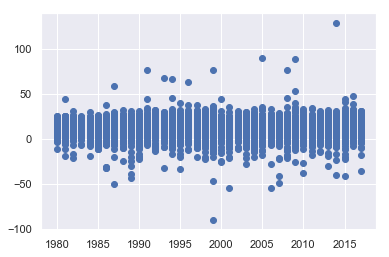

In [27]:
plt.scatter('Year', 'PER', data = df)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 5.000e+00,
        2.000e+00, 7.000e+00, 7.000e+00, 1.500e+01, 2.200e+01, 2.800e+01,
        8.200e+01, 1.480e+02, 3.680e+02, 1.062e+03, 4.085e+03, 7.298e+03,
        4.279e+03, 1.119e+03, 2.650e+02, 7.600e+01, 2.100e+01, 8.000e+00,
        5.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-90.6  , -86.206, -81.812, -77.418, -73.024, -68.63 , -64.236,
        -59.842, -55.448, -51.054, -46.66 , -42.266, -37.872, -33.478,
        -29.084, -24.69 , -20.296, -15.902, -11.508,  -7.114,  -2.72 ,
          1.674,   6.068,  10.462,  14.856,  19.25 ,  23.644,  28.038,
         32.432,  36.826,  41.22 ,  45.614,  50.008,  54.402,  58.796,
         63.19 ,  67.

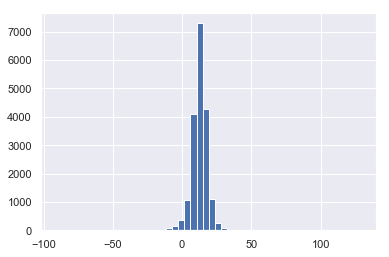

In [28]:
plt.hist('PER', bins=50, data = df)

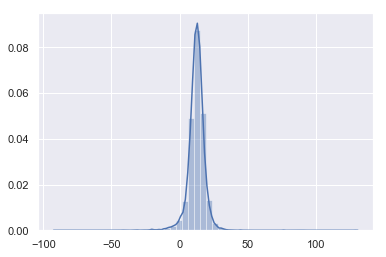

In [29]:
sns.distplot(df["PER"].values, norm_hist=True) 
plt.show()

## Exploring and Describing NBA Draft Data


In [30]:
d_file2 = "NBA_Draft_1980_2017.tsv"

In [31]:
df2 = pd.read_csv(d_file2, sep="\t")

In [32]:
df2.head()

,year,round,pick,player,position,school
0,1980,1,1.0,"Carroll, Joe Barry",F/C,Purdue
1,1980,1,2.0,"Griffith, Darrell",G,Louisville
2,1980,1,3.0,"McHale, Kevin",F/C,Minnesota
3,1980,1,4.0,"Ransey, Kelvin",G,Ohio State
4,1980,1,5.0,"Ray, James",F,Jacksonville


In [33]:
df2[["player"]].head()

,player
0,"Carroll, Joe Barry"
1,"Griffith, Darrell"
2,"McHale, Kevin"
3,"Ransey, Kelvin"
4,"Ray, James"


In [34]:
print(df2.columns)

Index(['year', 'round', 'pick', 'player', 'position', 'school'], dtype='object')


In [35]:
n_rows, n_columns = df2.shape  # get the shape of dataframe
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 2167, number of columns: 6


In [36]:
df2.dtypes

year          int64
round         int64
pick        float64
player       object
position     object
school       object
dtype: object

### Dealing With NaN Values

In [37]:
df2.isnull().sum()  # NaN counts in each column

year        0
round       0
pick        1
player      0
position    0
school      0
dtype: int64

In [38]:
index2drop = df2[df2["pick"].isnull()].index #Since 1 row will not change a lot of thing, we got rid of it by dropping it.
df2.drop(index2drop, inplace=True)

In [39]:
df2.isnull().sum()  # NaN counts in each column

year        0
round       0
pick        0
player      0
position    0
school      0
dtype: int64

#### Now second data is clean..

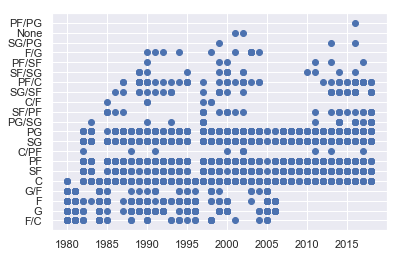

In [40]:
plt.scatter('year', 'position', data = df2)

(array([468., 468., 468., 456., 306.]),
 array([ 1. , 12.8, 24.6, 36.4, 48.2, 60. ]),
 <a list of 5 Patch objects>)

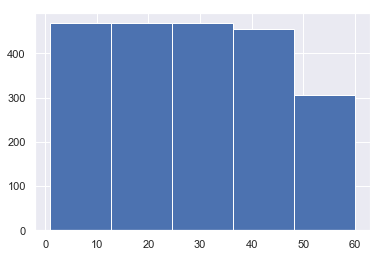

In [41]:
plt.hist('pick', bins=5, data = df2)

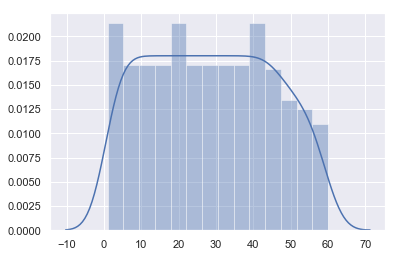

In [42]:
sns.distplot(df2["pick"].values, norm_hist=True)
plt.show()

In [43]:
df2_pick = df2[["pick", "player"]]

df2_pick.head()

,pick,player
0,1.0,"Carroll, Joe Barry"
1,2.0,"Griffith, Darrell"
2,3.0,"McHale, Kevin"
3,4.0,"Ransey, Kelvin"
4,5.0,"Ray, James"


In [44]:
df2_pick.rename(columns={'player': 'Player'}, inplace=True) #changing the name of column 'player' to 'Player', so that we can merge.

In [45]:
df2_pick.head()

,pick,Player
0,1.0,"Carroll, Joe Barry"
1,2.0,"Griffith, Darrell"
2,3.0,"McHale, Kevin"
3,4.0,"Ransey, Kelvin"
4,5.0,"Ray, James"


#### Name of some players in this dataset is in "surname , name" form. It is not the same format with the other dataset. So we convert those entries into "name surname" fromat

In [46]:
def CorrectPlayerName (row): #format of some player names in df2_pick is "surname, name". We should convert them to "name surname"
    
    player = row["Player"]
    
    if (',' in player): #if there is , in the name of the players
        
        player = player.split(",") #we have an list like ["name", "surname"]
        
        player_Surname = player[0]
        player_Name = player[1].lstrip() #lstrip =left strip, deletes the white space at left (of the first letter)
        
        player_Final_Name = player_Name + " " + player_Surname
        player_Final_Name = player_Final_Name.rstrip() #for omitting white space after the name
        
        return player_Final_Name
    else: 
        return player
        
df2_pick["Player"] = df2_pick.apply(CorrectPlayerName,axis=1)

In [47]:
df2_pick.head()

,pick,Player
0,1.0,Joe Barry Carroll
1,2.0,Darrell Griffith
2,3.0,Kevin McHale
3,4.0,Kelvin Ransey
4,5.0,James Ray


In [48]:
df2_school = df2[["school", "player"]]

df2_school.head()

,school,player
0,Purdue,"Carroll, Joe Barry"
1,Louisville,"Griffith, Darrell"
2,Minnesota,"McHale, Kevin"
3,Ohio State,"Ransey, Kelvin"
4,Jacksonville,"Ray, James"


In [49]:
df2_school.rename(columns={'player': 'Player'}, inplace=True)

df2_school["Player"] = df2_school.apply(CorrectPlayerName,axis=1)

In [50]:
df2_school.head()

,school,Player
0,Purdue,Joe Barry Carroll
1,Louisville,Darrell Griffith
2,Minnesota,Kevin McHale
3,Ohio State,Kelvin Ransey
4,Jacksonville,James Ray


In [51]:
df_temp = df

df_temp.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


#### Merging two datasets on player names in order to get their pick values

In [52]:
df_temp_merged = pd.merge(df_temp,df2_pick, on = ["Player"], how='inner')

df_temp_merged.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,pick
0,1980.0,Gerald Henderson,PG,24.0,BOS,76.0,2.0,1061.0,12.7,0.539,...,37.0,46.0,83.0,147.0,45.0,15.0,109.0,96.0,473.0,12.0
1,1981.0,Gerald Henderson,PG,25.0,BOS,82.0,10.0,1608.0,10.4,0.491,...,43.0,89.0,132.0,213.0,79.0,12.0,160.0,177.0,636.0,12.0
2,1982.0,Gerald Henderson,PG,26.0,BOS,82.0,31.0,1844.0,13.2,0.534,...,47.0,105.0,152.0,252.0,82.0,11.0,150.0,199.0,833.0,12.0
3,1983.0,Gerald Henderson,PG,27.0,BOS,82.0,9.0,1551.0,12.1,0.496,...,57.0,67.0,124.0,195.0,95.0,3.0,128.0,190.0,671.0,12.0
4,1984.0,Gerald Henderson,PG,28.0,BOS,78.0,78.0,2088.0,14.7,0.570,...,68.0,79.0,147.0,300.0,117.0,14.0,161.0,209.0,908.0,12.0


### Since we will use only PER for picked players we only take those values to another dataset

In [53]:
df_PER_PICK = df_temp_merged[["PER", "pick"]]

df_PER_PICK.head()

,PER,pick
0,12.7,12.0
1,10.4,12.0
2,13.2,12.0
3,12.1,12.0
4,14.7,12.0


#### Since there 60 picks we have decided to group them in groups of 10. So that we can examine all pick values equally.

In [54]:
def pickScale (row):
    
    CompareValue = row["pick"]
    
    if CompareValue > 0 and CompareValue < 11:
        return "pick_1-10"
    elif CompareValue > 10 and CompareValue < 21:
        return "pick_11-20"
    elif CompareValue > 20 and CompareValue < 31:
        return "pick_21-30"
    elif CompareValue > 30 and CompareValue < 41:
        return "pick_31-40"
    elif CompareValue > 40 and CompareValue < 51:
        return "pick_41-50"
    elif CompareValue > 50 and CompareValue < 61:
        return "pick_51-60"

    
df_PER_PICK["pick"] = df_PER_PICK.apply(pickScale,axis=1)

In [55]:
df_PER_PICK.head()

,PER,pick
0,12.7,pick_11-20
1,10.4,pick_11-20
2,13.2,pick_11-20
3,12.1,pick_11-20
4,14.7,pick_11-20


#### Means of groups of picks is as follows:

In [56]:
df_PER_PICK_mean = df_PER_PICK.groupby(by="pick", as_index = False).mean()

df_PER_PICK_mean

,pick,PER
0,pick_1-10,14.715262
1,pick_11-20,12.536828
2,pick_21-30,11.904473
3,pick_31-40,11.065339
4,pick_41-50,11.408281
5,pick_51-60,10.787885


#### Merging two datasets on player names in order to get their school names

In [57]:
df_temp_merged2 = pd.merge(df_temp,df2_school, on = ["Player"], how='inner')

df_temp_merged2.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,school
0,1980.0,Gerald Henderson,PG,24.0,BOS,76.0,2.0,1061.0,12.7,0.539,...,37.0,46.0,83.0,147.0,45.0,15.0,109.0,96.0,473.0,Duke
1,1981.0,Gerald Henderson,PG,25.0,BOS,82.0,10.0,1608.0,10.4,0.491,...,43.0,89.0,132.0,213.0,79.0,12.0,160.0,177.0,636.0,Duke
2,1982.0,Gerald Henderson,PG,26.0,BOS,82.0,31.0,1844.0,13.2,0.534,...,47.0,105.0,152.0,252.0,82.0,11.0,150.0,199.0,833.0,Duke
3,1983.0,Gerald Henderson,PG,27.0,BOS,82.0,9.0,1551.0,12.1,0.496,...,57.0,67.0,124.0,195.0,95.0,3.0,128.0,190.0,671.0,Duke
4,1984.0,Gerald Henderson,PG,28.0,BOS,78.0,78.0,2088.0,14.7,0.570,...,68.0,79.0,147.0,300.0,117.0,14.0,161.0,209.0,908.0,Duke


In [58]:
df_PER_SCHOOL = df_temp_merged2[["PER", "school"]]

df_PER_SCHOOL.head()

,PER,school
0,12.7,Duke
1,10.4,Duke
2,13.2,Duke
3,12.1,Duke
4,14.7,Duke


In [59]:
df_PER_SCHOOL = df_PER_SCHOOL.groupby(by="school", as_index = False).mean()

df_PER_SCHOOL.head()

,school,PER
0,AEK,-3.300000
1,Akasvayu Girona,18.722222
2,Alabama,12.947581
3,Alabama State,7.860000
4,Alabama,13.733333


In [60]:
#df_PER_SCHOOL = df_PER_SCHOOL.sort_values('PER',ascending=False)

#df_PER_SCHOOL.head()

# HYPOTHESIS TESTING

<b>First NULL Hypothesis:</b> If we divide picks into groups of 10. Being a player in the first group (1-10 picks) has no effect on effiency rating in NBA among other groups.

Since we have 6 mean values to compare we have decide to use ANOVA testing for tesiting this hypothesis.

In [61]:
pick1_10 = df_PER_PICK[df_PER_PICK["pick"] == "pick_1-10"]["PER"]
pick11_20 = df_PER_PICK[df_PER_PICK["pick"] == "pick_11-20"]["PER"]
pick21_30 = df_PER_PICK[df_PER_PICK["pick"] == "pick_21-30"]["PER"]
pick31_40 = df_PER_PICK[df_PER_PICK["pick"] == "pick_31-40"]["PER"]
pick41_50 = df_PER_PICK[df_PER_PICK["pick"] == "pick_41-50"]["PER"]
pick51_60 = df_PER_PICK[df_PER_PICK["pick"] == "pick_51-60"]["PER"]

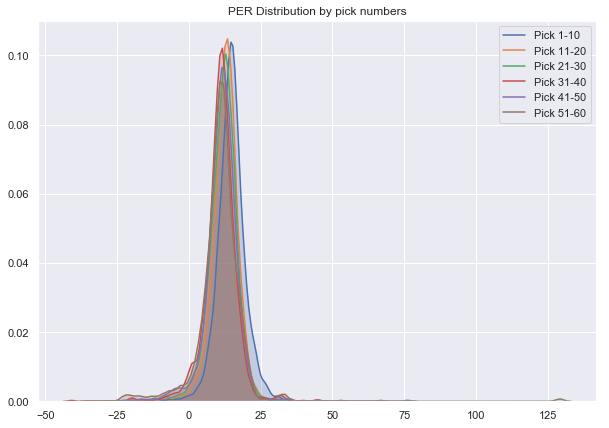

In [62]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

sns.kdeplot(pick1_10, shade=True, ax=ax, label="Pick 1-10")
sns.kdeplot(pick11_20, shade=True, ax=ax, label="Pick 11-20")
sns.kdeplot(pick21_30, shade=True, ax=ax, label="Pick 21-30")
sns.kdeplot(pick31_40, shade=True, ax=ax, label="Pick 31-40")
sns.kdeplot(pick41_50, shade=True, ax=ax, label="Pick 41-50")
sns.kdeplot(pick51_60, shade=True, ax=ax, label="Pick 51-60")

plt.title("PER Distribution by pick numbers")
plt.show()

In [63]:
stats.f_oneway(pick1_10,pick11_20,pick21_30,pick31_40,pick41_50,pick51_60)

F_onewayResult(statistic=164.32135466863937, pvalue=1.0487374721073858e-169)

Since pvalue is less than 0.05 we can reject our Null Hypothesis. This implies on that players in the first groups(picks 1-10) has effect on NBA by efficiency more than others.

<b>Second NULL Hypothesis:</b> Populer colleges has no effect on efficiency of players in NBA

In [64]:
school_UCLA = df_temp_merged2[df_temp_merged2["school"] == "UCLA"]["PER"]
school_Villanova = df_temp_merged2[df_temp_merged2["school"] == "Villanova"]["PER"]
school_Duke = df_temp_merged2[df_temp_merged2["school"] == "Duke"]["PER"]
school_Texas = df_temp_merged2[df_temp_merged2["school"] == "Texas"]["PER"]
school_NorthCarolina = df_temp_merged2[df_temp_merged2["school"] == "North Carolina"]["PER"]

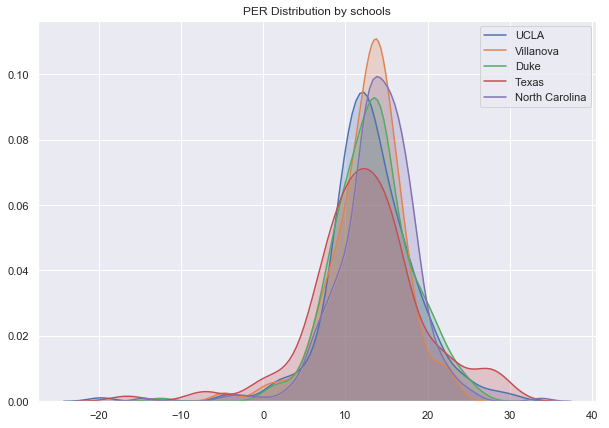

In [65]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

sns.kdeplot(school_UCLA, shade=True, ax=ax, label="UCLA")
sns.kdeplot(school_Villanova, shade=True, ax=ax, label="Villanova")
sns.kdeplot(school_Duke, shade=True, ax=ax, label="Duke")
sns.kdeplot(school_Texas, shade=True, ax=ax, label="Texas")
sns.kdeplot(school_NorthCarolina, shade=True, ax=ax, label="North Carolina")

plt.title("PER Distribution by schools")
plt.show()

In [66]:
stats.f_oneway(school_UCLA, school_Villanova,school_Duke,school_Texas,school_NorthCarolina)

F_onewayResult(statistic=1.9359156324407683, pvalue=0.10220055472260108)

Since pvalue is higher than 0.05 we fail to reject our Null Hypothesis. This implies on that we can say school has no effect on player's effieciency in NBA.

---------------------------

# LINEAR REGRESSION

------------------------------

In this part of the project. We will try to calculate "PER" values of players by using "BLK" and "PTS" values. Since calculating it is a regression problem, linear regression is a suitable method. Hence, we will train linear regression model with 75% of the dataset and apply a tesst on remaining 25%.

In [67]:
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


In [68]:
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS'],
      dtype='object')

In [69]:
from sklearn import datasets

df_PER = df[["PER"]]

df_BLK_PTS = df[["BLK", "PTS"]]

In [70]:
df_PER.head()

,PER
5727,25.3
5728,11.0
5729,19.2
5730,15.3
5731,7.4


In [71]:
df_BLK_PTS.head()

,BLK,PTS
5727,280.0,2034.0
5728,12.0,362.0
5729,55.0,1118.0
5730,10.0,1131.0
5731,15.0,86.0


In [72]:
# Importing the necessary modules for Linear Regression
from sklearn import linear_model
lr = linear_model.LinearRegression()

Splitting data into "train" and "test" where "train" will be 75% of the dataset and "test" will be remaining 25%.

In [73]:
from sklearn.model_selection import train_test_split

X = df_BLK_PTS
y = df_PER

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [74]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
lr.coef_ #coefficient of our futures

array([[0.01583658, 0.00680174]])

In [76]:
lr.intercept_

array([8.67173305])

In [77]:
# Creating a for loop to check coefficients of features
for index, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[0][index]))

The coefficient for BLK is 0.015836579944169923
The coefficient for PTS is 0.006801743907930424


In [78]:
lr.score(X_test, y_test)

0.29911640166237674

We used the mean square error for evaluation of the model.

In [79]:
from sklearn.metrics import mean_squared_error

y_predict = lr.predict(X_test)

lr_mse = mean_squared_error(y_predict, y_test)

print(lr_mse)

27.688882577919536


---------------------------------------------------------------------------

# MACHINE LEARNING

----------------------------------------------------------------------------------------------------

In this part of the project, we will try to use some machine learning (ML) methods to estimate some features of our data. To do that we will use our fisrt dataset (which was about player statistics). In that dataset, most of the values are numeric and estimating numeric values will require methods for solving regression problems. The only ways for handling regression problems we know are linear regression and decision trees (We know that SVM and kNN can also be used for regression problems,but since we could not be able to determine how we could implement it python we didn't use them for regression).

Hence we tried to solve a classification problem by using "Position" values in the dataset, since it was the only attribute which is actually a class. Thus, by using ML methods we would like to train our models with some part of the dataset and then guess the remaining part's position value, ie. we would like to determine which position do the player in the rows belong to. 

#### Preparing Data for ML methods.

Cleaning data, getting rid of NaN values and irrelevant information.

In [80]:
df_ML = df.drop(['Player'], axis= 1)
df_ML = df_ML.drop(['Year'], axis = 1)
df_ML = df_ML.drop(['Tm'], axis = 1)

df_ML = df_ML.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) #getting rid of NaN rows.
#since player name, year and Team has nothing to do with position.

In [81]:
df_ML.head()

,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5730,PG,31.0,80.0,80.0,2864.0,15.3,0.574,0.023,0.548,2.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5748,PF,23.0,82.0,82.0,2955.0,20.5,0.538,0.098,0.246,8.3,...,0.836,216.0,636.0,852.0,370.0,143.0,53.0,263.0,279.0,1745.0
5781,SF,29.0,82.0,7.0,1994.0,14.6,0.526,0.054,0.316,6.0,...,0.739,106.0,224.0,330.0,156.0,120.0,36.0,143.0,214.0,914.0
5786,SG,33.0,60.0,0.0,523.0,7.8,0.402,0.032,0.222,6.7,...,0.762,31.0,42.0,73.0,38.0,31.0,11.0,33.0,80.0,167.0
5802,C,31.0,66.0,55.0,2159.0,14.8,0.477,0.013,0.131,6.6,...,0.779,126.0,408.0,534.0,206.0,69.0,61.0,108.0,216.0,940.0


Creating our target and features datasets.

In [82]:
df_ML_target = df_ML['Pos']
df_ML_features = df_ML.drop(['Pos'], axis = 1)

In [83]:
df_ML_target = pd.DataFrame(df_ML_target, columns = ['Pos']) #converting it to a dataframe.

In [84]:
df_ML_target['Pos'].unique() #The classes that the methods could guess

array(['PG', 'PF', 'SF', 'SG', 'C', 'SG-SF', 'C-PF', 'PF-C', 'SF-SG',
       'SF-PF', 'PG-SG', 'SG-PG', 'PF-SF', 'PG-SF', 'SG-PF', 'C-SF'],
      dtype=object)

Splitting the data into training and testing part. We will train the model with 75% of data and testing will be done with 25%

In [85]:
X = df_ML_features
y = df_ML_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)

### Using kNN technique

In [86]:
from sklearn.neighbors import KNeighborsClassifier

#creating kNN model.
knn = KNeighborsClassifier(n_neighbors=5) #We would like to start with k=5, then we will try for other k's to find most efficient
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [87]:
y_pred = knn.predict(X_test) #predicting on the test part of the dataset

In [88]:
from sklearn import metrics

print("Accuracy of the model with k = 5 :",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 : 0.5400044081992506


Trying for different k values,to find the optimal one.

In [89]:
accuracy_list = []
for k in range (1, 30):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

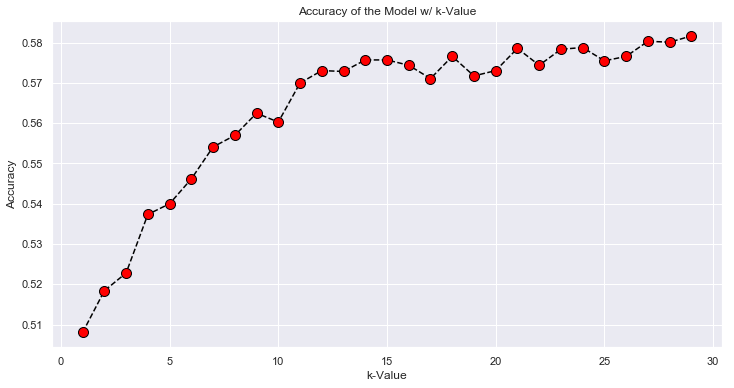

In [90]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()

--------------------------------------------------------------------------------------

## Decision Tree Method

In [91]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [92]:
model.fit(X_train, y_train) #Now, tree model is created and trained.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
y_predict = model.predict(X_test) #Testing.

In [94]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_score(y_test, y_predict)

0.5441921974873264

-------------------------------------------

### RE-TEST

In order to improve the accuracy of the models, we will try to decrease the number of classes that the model can predict. To do that, we will convert the positions which have a form like "X-Y" into only "X". So for example, if a player can play both SG-PG (ie, if it has "Pos" value as "SG-PG"), we will convert it to just "SG". So, predicting SG for such players would be enough for us.

In [95]:
def CorrectPlayerPosition (row): #SG-PG like positions will be converted to SG only.
    
    position = row["Pos"]
    
    if ('-' in position): #if there is - in the name of the players
        
        position = position.split("-") #we have an list like ["SG", "PG"]
        
        first_position = position[0]
        
        return first_position
    else: 
        return position
        
df_ML_ReTest = df_ML        
df_ML_ReTest["Pos"] = df_ML.apply(CorrectPlayerPosition,axis=1)

In [96]:
df_ML_target_ReTest = df_ML_ReTest['Pos']
df_ML_features_ReTest = df_ML_ReTest.drop(['Pos'], axis = 1)

df_ML_target_ReTest = pd.DataFrame(df_ML_target_ReTest, columns = ['Pos'])



In [97]:
df_ML_target_ReTest['Pos'].unique() #Now, we have 5 classes to predict.

array(['PG', 'PF', 'SF', 'SG', 'C'], dtype=object)

We will split the new dataset again, and apply the same kNN test that we have applied above with k = 5

In [98]:
X = df_ML_features_ReTest
y = df_ML_target_ReTest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)

In [99]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [100]:
y_pred = knn.predict(X_test)

In [101]:
print("Accuracy of the model with k = 5 :",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 : 0.5419880978620234
